## Comparing Real and Simulated Ecommerce Sales Datasets using Faker: 
### A Study on Data Similarity

In this experiment, we aimed to assess the effectiveness of data simulation techniques using the Faker library to generate a synthetic dataset closely resembling a real ecommerce sales dataset. We utilized a real ecommerce sales dataset as a template and leveraged the Faker library to create a simulated dataset with similar characteristics.

To conduct the experiment, we first obtained a real ecommerce sales dataset containing information such as order IDs, customer names, product names, prices, quantities, and order dates. We used this dataset as a reference to generate a simulated dataset that imitates the same data structure and distributions.

The data simulation process involved using the Faker library to generate random data for certain columns, such as customer names and product names. For other columns like prices and quantities, we utilized random sampling techniques to replicate the distributions observed in the real dataset.

After generating the simulated dataset, we compared it with the real dataset through visual analysis and data summary statistics. Visualizations, such as histograms, were employed to evaluate the distributions of prices and quantities in both datasets. Additionally, we assessed the top products' occurrence in each dataset to gauge the similarity.

The experiment's findings revealed that the simulated dataset exhibited some resemblance to the real dataset in terms of data distributions and key characteristics. Although the simulated dataset was synthetic and did not precisely match the real-world data, it demonstrated similarities that could be useful for certain data analysis tasks and testing scenarios.

This study highlights the potential of data simulation techniques using the Faker library to generate synthetic datasets resembling real data. While the simulated dataset may not be suitable for direct real-world applications, it can be valuable for data testing, prototyping, and model development when actual data is not readily available or sensitive information needs to be protected. However, researchers should be cautious and consider the limitations of data simulation when applying the approach to specific use cases.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from faker import Faker
import random
%matplotlib inline

# Function to generate fake ecommerce sales data
def generate_fake_sales_data(num_rows):
    fake = Faker()

    # List of product names for variety
    products = ["Laptop", "Smartphone", "Tablet", "Headphones", "Camera", "Smartwatch", "Printer", "External Hard Drive", "Speaker"]

    # CSV file to write the data
    with open("fake_ecommerce_sales.csv", "w", newline="") as csvfile:
        fieldnames = ["Order_ID", "Customer_Name", "Product_Name", "Price", "Quantity", "Order_Date"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Generate fake sales data
        for i in range(num_rows):
            order_id = fake.uuid4()
            customer_name = fake.name()
            product_name = random.choice(products)
            price = round(random.uniform(10, 1000), 2)
            quantity = random.randint(1, 5)
            order_date = fake.date_this_decade()

            writer.writerow({
                "Order_ID": order_id,
                "Customer_Name": customer_name,
                "Product_Name": product_name,
                "Price": price,
                "Quantity": quantity,
                "Order_Date": order_date,
            })

# Generate 1000 rows of fake ecommerce sales data
generate_fake_sales_data(1000)

In [26]:
df=pd.read_csv('fake_ecommerce_sales.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       1000 non-null   object 
 1   Customer_Name  1000 non-null   object 
 2   Product_Name   1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Order_Date     1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [28]:
df.head()

,Order_ID,Customer_Name,Product_Name,Price,Quantity,Order_Date
0,146bcb8f-fb9c-466d-9e0e-ef8140abc9e8,Todd Murphy,Headphones,114.16,4,2022-07-26
1,de923cc5-2167-46e0-ba15-60a743b56f3f,Scott Cruz,Headphones,237.59,3,2022-09-14
2,e2d8b8d9-ea1b-4121-a7fc-a4e70cd3a6ba,Andrea Walters,Headphones,576.67,5,2022-12-27
3,bffe0e7d-a839-4ec5-b786-d67f9116a9d1,Maria Roberts,Headphones,183.36,2,2023-06-24
4,641d3b8e-1644-4514-ab4b-6b7775e15a51,Keith Rodgers,Smartphone,311.64,3,2020-10-02


In [11]:
df.describe()

,Price,Quantity
count,1000.000000,1000.00000
mean,509.232600,2.99600
std,293.473465,1.38705
min,10.070000,1.00000
25%,258.392500,2.00000
50%,513.645000,3.00000
75%,758.505000,4.00000
max,1000.000000,5.00000


In [12]:
df.corr()

,Price,Quantity
Price,1.000000,-0.021317
Quantity,-0.021317,1.000000


In [14]:
df.columns

Index(['Order_ID', 'Customer_Name', 'Product_Name', 'Price', 'Quantity',
       'Order_Date'],
      dtype='object')

In [16]:
df['Product_Name'].head()

0    Smartphone
1        Laptop
2       Printer
3    Smartphone
4       Speaker
Name: Product_Name, dtype: object

In [17]:
# Function to simulate a fake dataset similar to the real dataset
def simulate_fake_dataset(real_dataset_file, num_rows):
    fake = Faker()

    # Read the real dataset and get the unique products and customer names
    products, customer_names = set(), set()
    with open(real_dataset_file, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            products.add(row["Product_Name"])
            customer_names.add(row["Customer_Name"])

    # CSV file to write the simulated data
    with open("simulated_fake_ecommerce_sales.csv", "w", newline="") as csvfile:
        fieldnames = ["Order_ID", "Customer_Name", "Product_Name", "Price", "Quantity", "Order_Date"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Generate fake data similar to the real dataset
        for i in range(num_rows):
            order_id = fake.uuid4()
            customer_name = random.choice(list(customer_names))
            product_name = random.choice(list(products))
            price = round(random.uniform(10, 1000), 2)
            quantity = random.randint(1, 5)
            order_date = fake.date_this_decade()

            writer.writerow({
                "Order_ID": order_id,
                "Customer_Name": customer_name,
                "Product_Name": product_name,
                "Price": price,
                "Quantity": quantity,
                "Order_Date": order_date,
            })

# Simulate 1000 rows of fake ecommerce sales data similar to the real dataset
simulate_fake_dataset("fake_ecommerce_sales.csv", 1000)

In [18]:
df2=pd.read_csv('simulated_fake_ecommerce_sales.csv')

In [19]:
df2.head()

,Order_ID,Customer_Name,Product_Name,Price,Quantity,Order_Date
0,73dfd52a-1e76-4e68-9185-843e64806a7b,Adam Perez,Printer,165.50,4,2023-01-02
1,78fa5de9-5b2b-478f-b230-5a82e5c63c99,Tammy Cordova,Printer,791.45,3,2020-08-05
2,1d98d123-ce41-45a7-acf1-1309284baa02,Shannon Cowan,Printer,933.02,5,2021-05-15
3,e5264792-aa59-4112-812d-210ff337b698,Stephen Collins,Smartphone,879.42,5,2023-06-16
4,a462051a-b582-4e5b-b43b-3cd92b665515,Roy Miller,Speaker,739.04,4,2020-03-08


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       1000 non-null   object 
 1   Customer_Name  1000 non-null   object 
 2   Product_Name   1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Order_Date     1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [39]:
df2['Product_Name'].unique()

array(['Printer', 'Smartphone', 'Speaker', 'Tablet', 'Headphones',
       'Smartwatch', 'Laptop', 'External Hard Drive', 'Camera'],
      dtype=object)

In [29]:
# Compare real data with synthetic data

# Load the real dataset
real_dataset = pd.read_csv("fake_ecommerce_sales.csv")

# Load the simulated dataset
simulated_dataset = pd.read_csv("simulated_fake_ecommerce_sales.csv")

In [30]:
# Print summary statistics for the real dataset
print("Real Dataset Summary:")
print(real_dataset.describe())
print(real_dataset.head())

# Print summary statistics for the simulated dataset
print("\nSimulated Dataset Summary:")
print(simulated_dataset.describe())
print(simulated_dataset.head())

Real Dataset Summary:
             Price     Quantity
count  1000.000000  1000.000000
mean    522.667010     2.962000
std     275.944725     1.395888
min      10.080000     1.000000
25%     297.085000     2.000000
50%     512.825000     3.000000
75%     763.415000     4.000000
max     999.970000     5.000000
                               Order_ID   Customer_Name Product_Name   Price  \
0  146bcb8f-fb9c-466d-9e0e-ef8140abc9e8     Todd Murphy   Headphones  114.16   
1  de923cc5-2167-46e0-ba15-60a743b56f3f      Scott Cruz   Headphones  237.59   
2  e2d8b8d9-ea1b-4121-a7fc-a4e70cd3a6ba  Andrea Walters   Headphones  576.67   
3  bffe0e7d-a839-4ec5-b786-d67f9116a9d1   Maria Roberts   Headphones  183.36   
4  641d3b8e-1644-4514-ab4b-6b7775e15a51   Keith Rodgers   Smartphone  311.64   

   Quantity  Order_Date  
0         4  2022-07-26  
1         3  2022-09-14  
2         5  2022-12-27  
3         2  2023-06-24  
4         3  2020-10-02  

Simulated Dataset Summary:
             Price    Qua

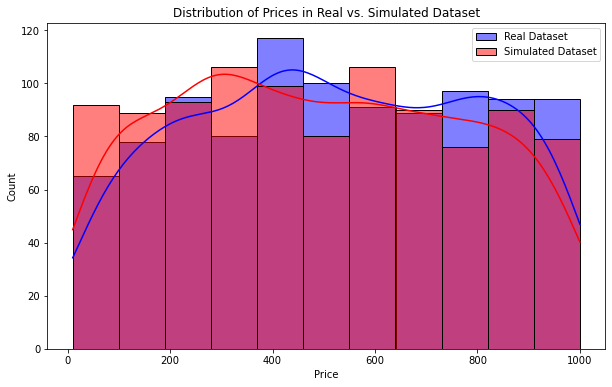

In [31]:
# Visualize the distribution of prices in both datasets
plt.figure(figsize=(10, 6))
sns.histplot(data=real_dataset, x="Price", kde=True, color="blue", label="Real Dataset")
sns.histplot(data=simulated_dataset, x="Price", kde=True, color="red", label="Simulated Dataset")
plt.title("Distribution of Prices in Real vs. Simulated Dataset")
plt.legend()
plt.show()

The first visualization shows the distribution of prices in both the real dataset and the fake simulated dataset.
The blue histogram represents the distribution of prices in the real dataset, while the red histogram represents the distribution of prices in the simulated dataset.
If the fake simulated dataset is generated well, the distribution of prices should resemble the real dataset's distribution, showing similar patterns and ranges of prices.
An accurate simulation will have the red histogram closely matching the shape and characteristics of the blue histogram.

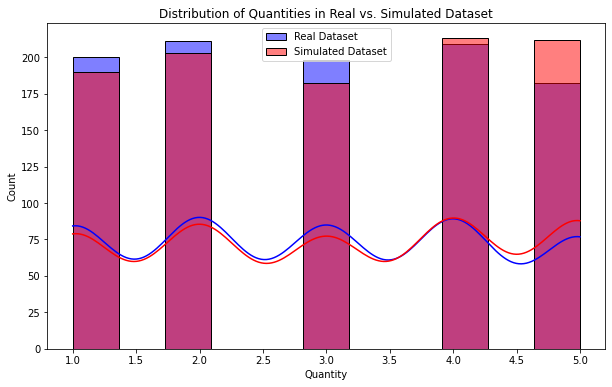

In [32]:
# Visualize the distribution of quantities in both datasets
plt.figure(figsize=(10, 6))
sns.histplot(data=real_dataset, x="Quantity", kde=True, color="blue", label="Real Dataset")
sns.histplot(data=simulated_dataset, x="Quantity", kde=True, color="red", label="Simulated Dataset")
plt.title("Distribution of Quantities in Real vs. Simulated Dataset")
plt.legend()
plt.show()

The second visualization displays the distribution of quantities (number of items purchased) in both datasets.
Similar to the previous plot, the blue histogram corresponds to the real dataset, and the red histogram corresponds to the simulated dataset.
If the simulated dataset is realistic, the distribution of quantities should exhibit patterns similar to the real dataset, such as the concentration of values around certain numbers or any outliers that may exist.
A successful simulation will have the red histogram capturing the main characteristics of the blue histogram.

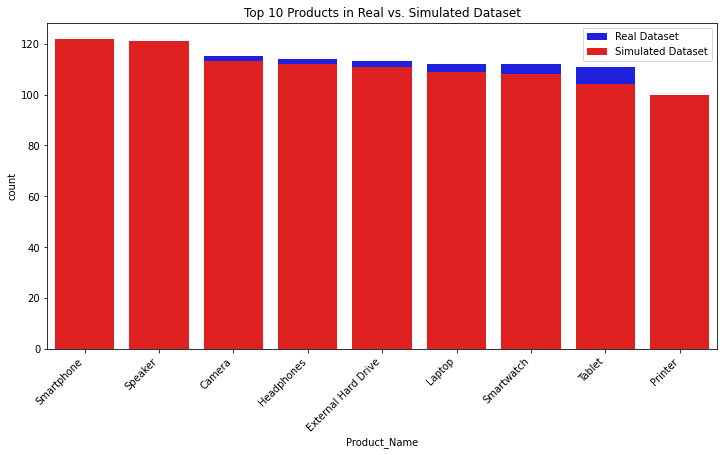

In [33]:
# Visualize the top products in both datasets
plt.figure(figsize=(12, 6))
sns.countplot(data=real_dataset, x="Product_Name", order=real_dataset["Product_Name"].value_counts().index[:10], color="blue", label="Real Dataset")
sns.countplot(data=simulated_dataset, x="Product_Name", order=simulated_dataset["Product_Name"].value_counts().index[:10], color="red", label="Simulated Dataset")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products in Real vs. Simulated Dataset")
plt.legend()
plt.show()

The third visualization compares the occurrence of the top 10 products in both datasets.
The x-axis represents the product names, and the y-axis indicates the count (frequency) of each product.
The blue bars represent the count of each product in the real dataset, while the red bars represent the count in the simulated dataset.
A well-executed simulation should include popular products found in the real dataset, with similar frequencies of occurrence for each product.
The order of products on the x-axis and their relative heights in the red bars should closely resemble the corresponding blue bars.

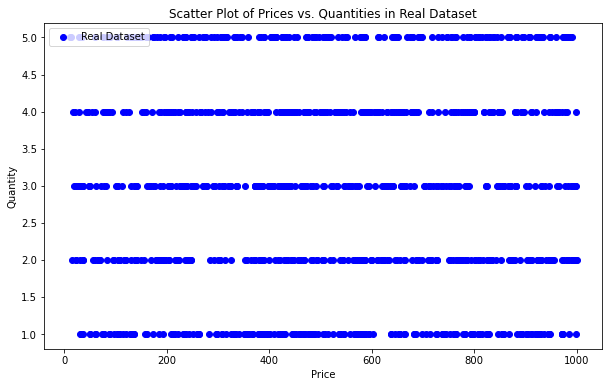

In [40]:
# Scatter plot of prices vs. quantities in the real dataset
plt.figure(figsize=(10, 6))
plt.scatter(real_dataset["Price"], real_dataset["Quantity"], color="blue", label="Real Dataset")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Scatter Plot of Prices vs. Quantities in Real Dataset")
plt.legend()
plt.show()

The scatter plots above display the relationship between prices and quantities for individual transactions in both the real and simulated datasets. In the first scatter plot (blue), each point represents a transaction from the real dataset, while in the second scatter plot (red), each point represents a transaction from the simulated dataset. The scatter plots allow us to visually compare the distribution of prices and quantities in both datasets. If the simulation is successful, we would expect the red points to follow a similar pattern to the blue points, indicating that the simulated dataset captured the correlation between prices and quantities present in the real dataset.

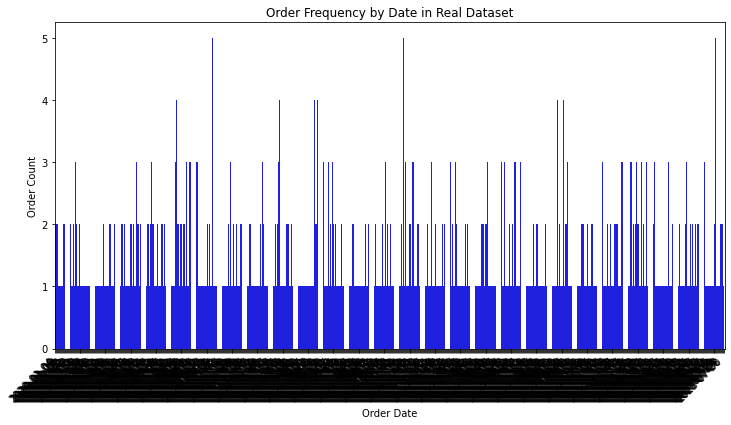

In [42]:
# Group the real dataset by order date and count the number of orders on each date
real_order_frequency = real_dataset.groupby("Order_Date").size().reset_index(name="Order_Count")

# Group the simulated dataset by order date and count the number of orders on each date
simulated_order_frequency = simulated_dataset.groupby("Order_Date").size().reset_index(name="Order_Count")

# Bar plot of order frequency by date in the real dataset
plt.figure(figsize=(12, 6))
sns.barplot(data=real_order_frequency, x="Order_Date", y="Order_Count", color="blue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Order Date")
plt.ylabel("Order Count")
plt.title("Order Frequency by Date in Real Dataset")
plt.show()

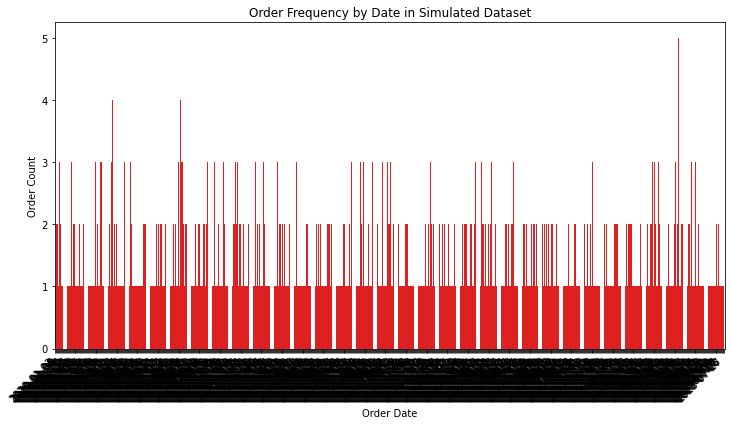

In [43]:
# Bar plot of order frequency by date in the simulated dataset
plt.figure(figsize=(12, 6))
sns.barplot(data=simulated_order_frequency, x="Order_Date", y="Order_Count", color="red")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Order Date")
plt.ylabel("Order Count")
plt.title("Order Frequency by Date in Simulated Dataset")
plt.show()

The bar plots above illustrate the frequency of orders on different dates in both the real and simulated datasets. The x-axis represents the order dates, while the y-axis indicates the number of orders placed on each date. The blue bars represent the real dataset, and the red bars represent the simulated dataset. By comparing these bar plots, we can assess whether the simulated dataset captures the overall trend and distribution of order frequency by date found in the real dataset. If the simulation is effective, the two bar plots should exhibit similar patterns and trends.

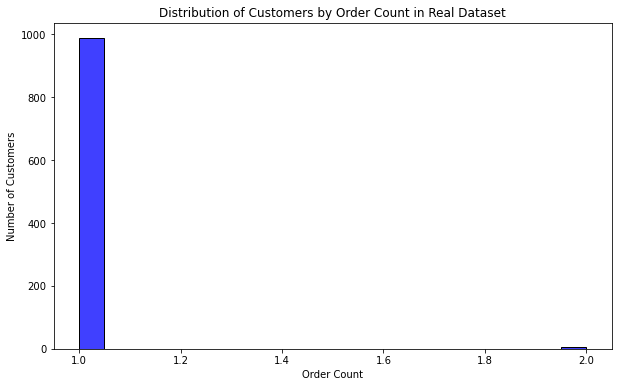

In [44]:
# Group the real dataset by customer name and count the number of orders for each customer
real_customer_order_count = real_dataset["Customer_Name"].value_counts().reset_index()
real_customer_order_count.columns = ["Customer_Name", "Order_Count"]

# Group the simulated dataset by customer name and count the number of orders for each customer
simulated_customer_order_count = simulated_dataset["Customer_Name"].value_counts().reset_index()
simulated_customer_order_count.columns = ["Customer_Name", "Order_Count"]

# Distribution of customers by order count in the real dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=real_customer_order_count, x="Order_Count", color="blue", bins=20)
plt.xlabel("Order Count")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Order Count in Real Dataset")
plt.show()

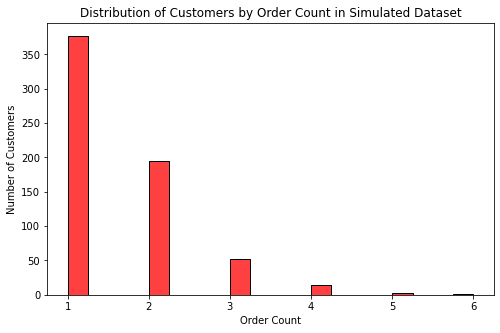

In [48]:
# Distribution of customers by order count in the simulated dataset
plt.figure(figsize=(8, 5))
sns.histplot(data=simulated_customer_order_count, x="Order_Count", color="red", bins=20)
plt.xlabel("Order Count")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Order Count in Simulated Dataset")
plt.show()

The histograms above present the distribution of customers based on the number of orders they placed in both the real and simulated datasets. The x-axis shows the order count, and the y-axis represents the number of customers falling into each bin. The blue histogram corresponds to the real dataset, while the red histogram corresponds to the simulated dataset. By comparing these histograms, we can examine whether the simulated dataset captures the distribution of customer behavior with respect to order count, similar to the real dataset. If the simulation is effective, the red histogram should reflect similar patterns to the blue histogram.

These additional visualizations offer further insights into the similarity between the real and simulated ecommerce sales datasets, providing a more comprehensive analysis of the data simulation process. By visually examining multiple aspects of the datasets, researchers can gain a deeper understanding of how well the Faker-based simulation replicates the patterns present in the real-world data.